Import relevant modules from libraries.

In [275]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
import matplotlib.pyplot as plt

Import data file.

In [276]:
# Import the data 
df = pd.read_csv("dataset_breastCancer.csv", sep=',')

Take a look at the summary of the dataset.

In [277]:
df.head()  #see data fields

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [278]:
df.info()  #see data summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [279]:
df.isnull().sum()  #see if there is any null field in the data

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Let's drop the columns which are not required.

In [280]:
df.drop(["id","Unnamed: 32"], axis=1, inplace=True)

We can see from the dataset that there is one column, diagnosis which is non-numerical.

In [281]:
df.dtypes.value_counts()  #check number of data types

float64    30
object      1
dtype: int64

In [282]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Since the target column is categorical, we will proceed with label encoding.

In [283]:
y = df["diagnosis"]   #target column
X = df.drop(["diagnosis"], axis=1)   #feature columns
y = LabelEncoder().fit_transform(y)  #label encode categorical column

Split the data into train and test set.

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)  #split the dataset

Scale the data.

In [285]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)   #Scale the features
X_test = sc.transform(X_test)
X_train.shape

(398, 30)

Initialise the model and create ANN. Adjust the parameter by observing mse and val_mse.

In [286]:
nn = Sequential()
#Adding the layers, first input layer shape is 30
nn.add(Dense(15, activation="relu", input_shape=(30,)))
nn.add(Dense(1, activation="sigmoid"))
#Compile the ANN
nn.compile(optimizer="adam",loss="mean_squared_error", metrics=["mse"]) #e = 80
#Fit the ANN
nn.fit(X_train, y_train, validation_split=0.2, epochs=80, batch_size=5, shuffle = True)  #Tune the parameter to get low mse
test_loss, test_error = nn.evaluate(X_test, y_test)
print("The test error is {}".format(test_error)) #observe the val_mse to adjust the parameter         

Train on 318 samples, validate on 80 samples
Epoch 1/80
318/318 [==============================] - 1s 2ms/step - loss: 0.2064 - mse: 0.2064 - val_loss: 0.1499 - val_mse: 0.1499
Epoch 2/80
318/318 [==============================] - 0s 1ms/step - loss: 0.0981 - mse: 0.0981 - val_loss: 0.0920 - val_mse: 0.0920
Epoch 3/80
318/318 [==============================] - 1s 2ms/step - loss: 0.0654 - mse: 0.0654 - val_loss: 0.0683 - val_mse: 0.0683
Epoch 4/80
318/318 [==============================] - 0s 1ms/step - loss: 0.0483 - mse: 0.0483 - val_loss: 0.0571 - val_mse: 0.0571
Epoch 5/80
318/318 [==============================] - 0s 1ms/step - loss: 0.0388 - mse: 0.0388 - val_loss: 0.0510 - val_mse: 0.0510
Epoch 6/80
318/318 [==============================] - 0s 979us/step - loss: 0.0330 - mse: 0.0330 - val_loss: 0.0475 - val_mse: 0.0475
Epoch 7/80
318/318 [==============================] - 0s 1ms/step - loss: 0.0289 - mse: 0.0289 - val_loss: 0.0456 - val_mse: 0.0456
Epoch 8/80
318/318 [=========

Initialise the ANN model and get the accuracy.

In [287]:
nn = Sequential()
nn.add(Dense(15, activation="relu", input_shape=(30,)))
nn.add(Dense(1, activation="sigmoid"))
#Compile the ANN
nn.compile(optimizer="adam",loss="binary_crossentropy", metrics=["accuracy"])
#Fit the ANN
his = nn.fit(X_train, y_train, epochs=80, batch_size=5, shuffle = True, validation_data = (X_test, y_test))
print("The test accuracy is {}".format(test_acc))  #get the test acc

Train on 398 samples, validate on 171 samples
Epoch 1/80
398/398 [==============================] - 1s 3ms/step - loss: 0.3750 - accuracy: 0.9070 - val_loss: 0.2236 - val_accuracy: 0.9474
Epoch 2/80
398/398 [==============================] - 0s 1ms/step - loss: 0.1939 - accuracy: 0.9472 - val_loss: 0.1523 - val_accuracy: 0.9649
Epoch 3/80
398/398 [==============================] - 1s 1ms/step - loss: 0.1461 - accuracy: 0.9598 - val_loss: 0.1248 - val_accuracy: 0.9708
Epoch 4/80
398/398 [==============================] - 1s 1ms/step - loss: 0.1223 - accuracy: 0.9598 - val_loss: 0.1085 - val_accuracy: 0.9708
Epoch 5/80
398/398 [==============================] - 1s 2ms/step - loss: 0.1071 - accuracy: 0.9648 - val_loss: 0.0989 - val_accuracy: 0.9708
Epoch 6/80
398/398 [==============================] - 0s 1ms/step - loss: 0.0966 - accuracy: 0.9648 - val_loss: 0.0926 - val_accuracy: 0.9708
Epoch 7/80
398/398 [==============================] - 0s 1ms/step - loss: 0.0881 - accuracy: 0.9698 - 

398/398 [==============================] - 1s 2ms/step - loss: 0.0152 - accuracy: 0.9950 - val_loss: 0.1117 - val_accuracy: 0.9883
Epoch 59/80
398/398 [==============================] - 0s 1ms/step - loss: 0.0145 - accuracy: 0.9950 - val_loss: 0.1107 - val_accuracy: 0.9883
Epoch 60/80
398/398 [==============================] - 1s 2ms/step - loss: 0.0142 - accuracy: 0.9950 - val_loss: 0.1134 - val_accuracy: 0.9883
Epoch 61/80
398/398 [==============================] - 1s 1ms/step - loss: 0.0139 - accuracy: 0.9950 - val_loss: 0.1121 - val_accuracy: 0.9883
Epoch 62/80
398/398 [==============================] - 1s 2ms/step - loss: 0.0132 - accuracy: 0.9950 - val_loss: 0.1152 - val_accuracy: 0.9883
Epoch 63/80
398/398 [==============================] - 0s 1ms/step - loss: 0.0130 - accuracy: 0.9975 - val_loss: 0.1181 - val_accuracy: 0.9883
Epoch 64/80
398/398 [==============================] - 1s 1ms/step - loss: 0.0127 - accuracy: 0.9975 - val_loss: 0.1171 - val_accuracy: 0.9883
Epoch 65/80

Plot learning curve

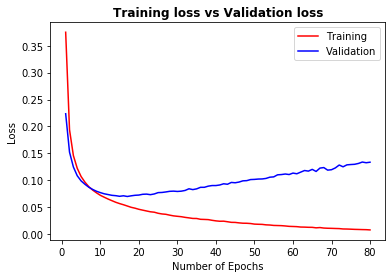

In [288]:
loss_plt = his.history
loss_value = loss_plt["loss"]          
val_lossval = loss_plt["val_loss"]
epochs = range(1, len(loss_value) + 1)
plt.plot(epochs, loss_value, "r", label="Training")
plt.plot(epochs, val_lossval, "b", label="Validation")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training loss vs Validation loss", fontweight="bold", fontsize=12)
plt.legend(loc="upper right")
plt.show()

As we can see the model overfits, let try to handle the overfitting either by 1) removing the network capacity (by removing additional layers), 2) use dropout layers.

Using First method: removing additional layer

In [289]:
nna = Sequential()
#remove first input layer
#nn.add(Dense(15, activation="relu", input_shape=(30,)))
nna.add(Dense(1, activation="sigmoid"))
#Compile the ANN
nna.compile(optimizer="adam",loss="binary_crossentropy", metrics=["accuracy"])
#Fit the ANN
hisa = nna.fit(X_train, y_train, epochs=80, batch_size=5, shuffle = True, validation_data = (X_test, y_test))
print("The test accuracy is {}".format(test_acc))

Train on 398 samples, validate on 171 samples
Epoch 1/80
398/398 [==============================] - 1s 2ms/step - loss: 1.2976 - accuracy: 0.2111 - val_loss: 1.0055 - val_accuracy: 0.2982
Epoch 2/80
398/398 [==============================] - 1s 1ms/step - loss: 0.7824 - accuracy: 0.4849 - val_loss: 0.5927 - val_accuracy: 0.6491
Epoch 3/80
398/398 [==============================] - 0s 1ms/step - loss: 0.5173 - accuracy: 0.7764 - val_loss: 0.4019 - val_accuracy: 0.9064
Epoch 4/80
398/398 [==============================] - 1s 2ms/step - loss: 0.3889 - accuracy: 0.8970 - val_loss: 0.3074 - val_accuracy: 0.9649
Epoch 5/80
398/398 [==============================] - 1s 2ms/step - loss: 0.3175 - accuracy: 0.9196 - val_loss: 0.2511 - val_accuracy: 0.9766
Epoch 6/80
398/398 [==============================] - 1s 1ms/step - loss: 0.2711 - accuracy: 0.9296 - val_loss: 0.2163 - val_accuracy: 0.9825
Epoch 7/80
398/398 [==============================] - 0s 922us/step - loss: 0.2389 - accuracy: 0.9372 

Epoch 58/80
398/398 [==============================] - 0s 1ms/step - loss: 0.0657 - accuracy: 0.9849 - val_loss: 0.0624 - val_accuracy: 0.9942
Epoch 59/80
398/398 [==============================] - 0s 1ms/step - loss: 0.0653 - accuracy: 0.9849 - val_loss: 0.0621 - val_accuracy: 0.9942
Epoch 60/80
398/398 [==============================] - 1s 2ms/step - loss: 0.0649 - accuracy: 0.9849 - val_loss: 0.0619 - val_accuracy: 0.9942
Epoch 61/80
398/398 [==============================] - 1s 1ms/step - loss: 0.0645 - accuracy: 0.9849 - val_loss: 0.0618 - val_accuracy: 0.9942
Epoch 62/80
398/398 [==============================] - 1s 2ms/step - loss: 0.0641 - accuracy: 0.9849 - val_loss: 0.0615 - val_accuracy: 0.9942
Epoch 63/80
398/398 [==============================] - 0s 1ms/step - loss: 0.0637 - accuracy: 0.9849 - val_loss: 0.0614 - val_accuracy: 0.9942
Epoch 64/80
398/398 [==============================] - 0s 1ms/step - loss: 0.0633 - accuracy: 0.9849 - val_loss: 0.0612 - val_accuracy: 0.9942

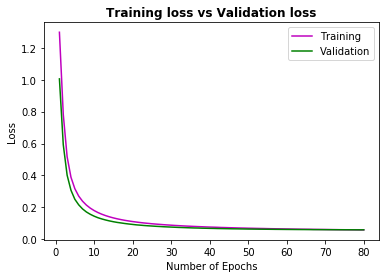

In [290]:
loss_plt = hisa.history
loss_value = loss_plt["loss"]          
val_lossval = loss_plt["val_loss"]
epochs = range(1, len(loss_value) + 1)
plt.plot(epochs, loss_value, "m", label="Training")
plt.plot(epochs, val_lossval, "g", label="Validation")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training loss vs Validation loss", fontweight="bold", fontsize=12)
plt.legend(loc="upper right")
plt.show()

Using second method: add dropout layers

In [299]:
#removing additional layer
nnb = Sequential()
nnb.add(Dense(15, activation="relu", input_shape=(30,)))
#add droput layer
nnb.add(Dropout(rate=0.2))
nnb.add(Dense(1, activation="sigmoid"))
#Compile the ANN
nnb.compile(optimizer="adam",loss="binary_crossentropy", metrics=["accuracy"])
#Fit the ANN
hisb = nnb.fit(X_train, y_train, epochs=80, batch_size=5, shuffle = True, validation_data = (X_test, y_test))
print("The test accuracy is {}".format(test_acc))

Train on 398 samples, validate on 171 samples
Epoch 1/80
398/398 [==============================] - 1s 2ms/step - loss: 0.5897 - accuracy: 0.6784 - val_loss: 0.2602 - val_accuracy: 0.9708
Epoch 2/80
398/398 [==============================] - 0s 1ms/step - loss: 0.2908 - accuracy: 0.9296 - val_loss: 0.1496 - val_accuracy: 0.9825
Epoch 3/80
398/398 [==============================] - 1s 1ms/step - loss: 0.1987 - accuracy: 0.9548 - val_loss: 0.1083 - val_accuracy: 0.9883
Epoch 4/80
398/398 [==============================] - 1s 2ms/step - loss: 0.1589 - accuracy: 0.9523 - val_loss: 0.0884 - val_accuracy: 0.9825
Epoch 5/80
398/398 [==============================] - 1s 2ms/step - loss: 0.1397 - accuracy: 0.9497 - val_loss: 0.0793 - val_accuracy: 0.9883
Epoch 6/80
398/398 [==============================] - 1s 2ms/step - loss: 0.1150 - accuracy: 0.9698 - val_loss: 0.0710 - val_accuracy: 0.9883
Epoch 7/80
398/398 [==============================] - 1s 2ms/step - loss: 0.0914 - accuracy: 0.9724 - 

398/398 [==============================] - 1s 1ms/step - loss: 0.0255 - accuracy: 0.9899 - val_loss: 0.0569 - val_accuracy: 0.9883
Epoch 59/80
398/398 [==============================] - 1s 1ms/step - loss: 0.0286 - accuracy: 0.9899 - val_loss: 0.0564 - val_accuracy: 0.9942
Epoch 60/80
398/398 [==============================] - 1s 1ms/step - loss: 0.0266 - accuracy: 0.9925 - val_loss: 0.0559 - val_accuracy: 0.9942
Epoch 61/80
398/398 [==============================] - 0s 1ms/step - loss: 0.0253 - accuracy: 0.9925 - val_loss: 0.0559 - val_accuracy: 0.9942
Epoch 62/80
398/398 [==============================] - 0s 1ms/step - loss: 0.0304 - accuracy: 0.9899 - val_loss: 0.0551 - val_accuracy: 0.9942
Epoch 63/80
398/398 [==============================] - 1s 1ms/step - loss: 0.0331 - accuracy: 0.9849 - val_loss: 0.0551 - val_accuracy: 0.9942
Epoch 64/80
398/398 [==============================] - 1s 1ms/step - loss: 0.0236 - accuracy: 0.9925 - val_loss: 0.0558 - val_accuracy: 0.9942
Epoch 65/80

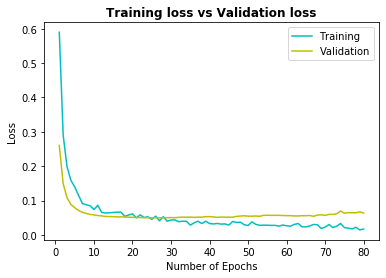

In [300]:
lossplt = hisb.history
lossvalue = lossplt["loss"]          
vallossval = lossplt["val_loss"]
epochs = range(1, len(lossvalue) + 1)
plt.plot(epochs, lossvalue, "c", label="Training")
plt.plot(epochs, vallossval, "y", label="Validation")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training loss vs Validation loss", fontweight="bold", fontsize=12)
plt.legend(loc="upper right")
plt.show() 

Comparison of the validation accuracy of the three models.

In [301]:
print("First model - val_accuracy: {}".format(his.history["val_accuracy"][-1]))
print("Second model(remove layer) - val_accuracy: {}".format(hisa.history["val_accuracy"][-1]))
print("Third model(add dropout) - val_accuracy: {}".format(hisb.history["val_accuracy"][-1]))

First model - val_accuracy: 0.988304078578949
Second model(remove layer) - val_accuracy: 0.9941520690917969
Third model(add dropout) - val_accuracy: 0.988304078578949


We can see that the second model has the highest validation accuracy, however, the test accuracy for the three models are
the same. Based on the loss graph, the second model fits better.

In [302]:
nna.summary()  #second model

Model: "sequential_523"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_307 (Dense)            (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
